In [1]:
import pandas as pd
import numpy as np
import pickle
import torch


In [2]:
c, sparse_matrix = pickle.load(open('user_item_matrix.p', 'rb'))

In [3]:
M=sparse_matrix.tocsr()

In [4]:
metadata_df = pd.read_csv('data.csv')
song_meta = metadata_df[metadata_df['id'].isin(c)]

<Axes: >

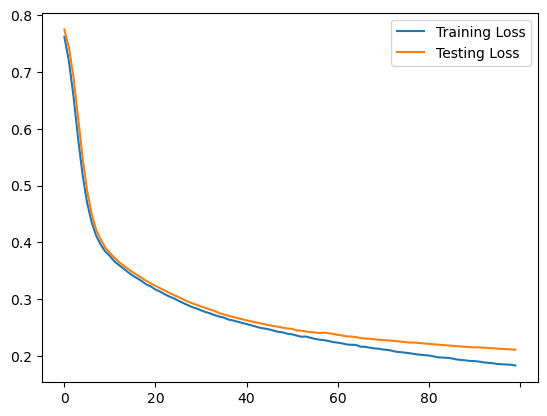

In [223]:
res=pd.read_csv('gmf_models/gmf_256_1e-05.csv').drop('Unnamed: 0',axis=1).T
res.columns=['Training Loss', 'Testing Loss', 'Hit Rate', 'NDCG']
res[['Training Loss', 'Testing Loss']].plot()

<Axes: >

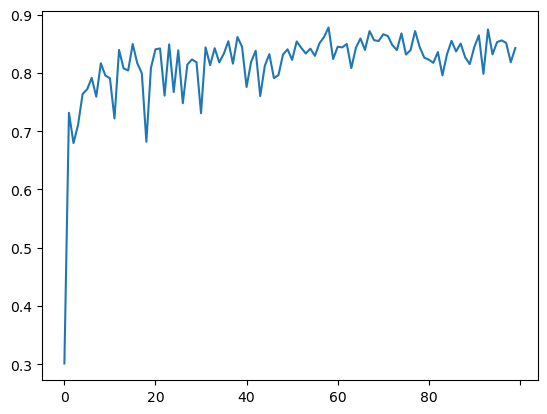

In [226]:
res['Hit Rate'].plot()

<Axes: >

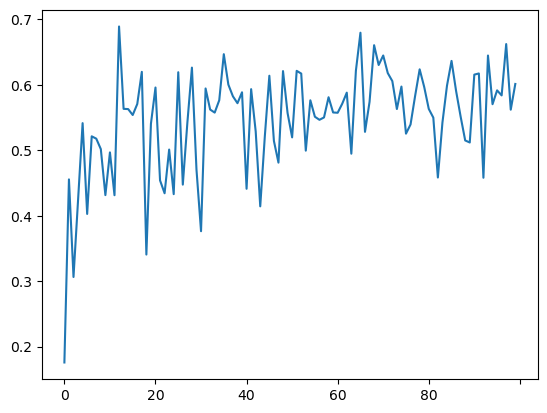

In [227]:
res['NDCG'].plot()

<Axes: >

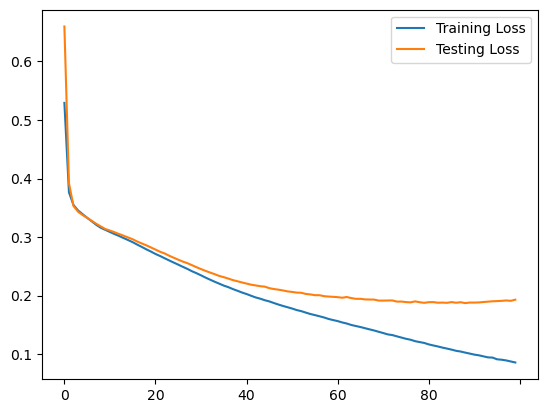

In [259]:
res=pd.read_csv('mlp_models/mlp_256_1e-05.csv').drop('Unnamed: 0',axis=1).T
res.columns=['Training Loss', 'Testing Loss', 'Hit Rate', 'NDCG']
res[['Training Loss', 'Testing Loss']].plot()

<Axes: >

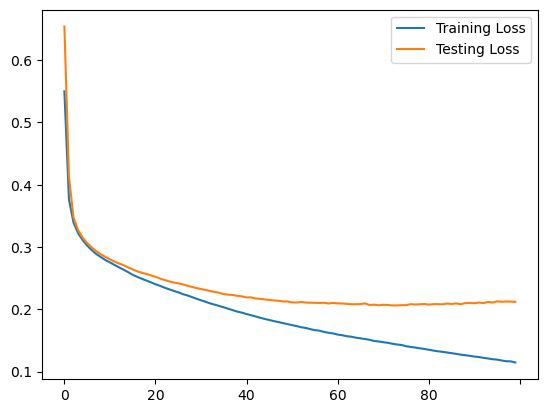

In [22]:
res=pd.read_csv('nmf_models/nmf_256_1e-05.csv').drop('Unnamed: 0',axis=1).T
res.columns=['Training Loss', 'Testing Loss', 'Hit Rate', 'NDCG']
res[['Training Loss', 'Testing Loss']].plot()

<Axes: >

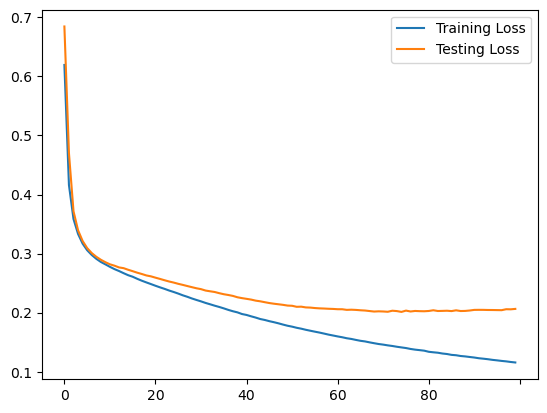

In [23]:
res=pd.read_csv('nmf_256_1e-05.csv').drop('Unnamed: 0',axis=1).T
res.columns=['Training Loss', 'Testing Loss', 'Hit Rate', 'NDCG']
res[['Training Loss', 'Testing Loss']].plot()

<Axes: >

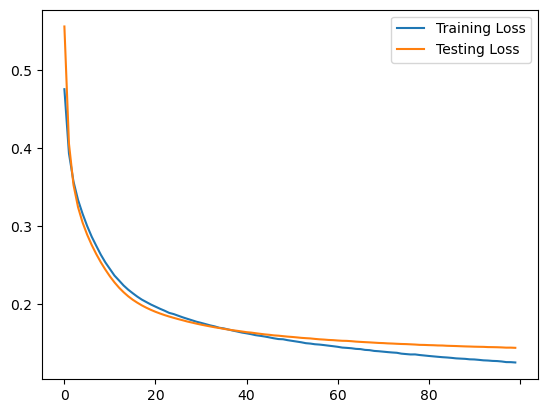

In [278]:
res=pd.read_csv('nmf_pt_256_1e-06.csv').drop('Unnamed: 0',axis=1).T
res.columns=['Training Loss', 'Testing Loss', 'Hit Rate', 'NDCG']
res[['Training Loss', 'Testing Loss']].plot()

<Axes: >

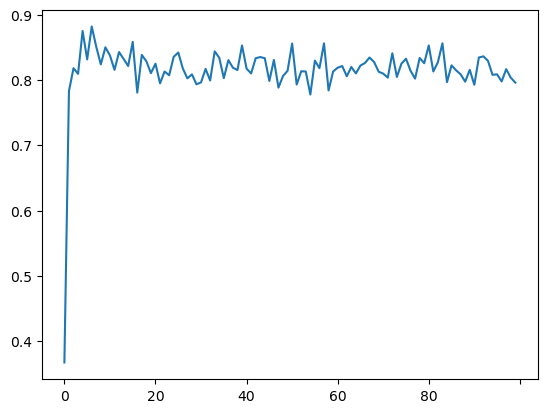

In [300]:
res['Hit Rate'].plot()

<Axes: >

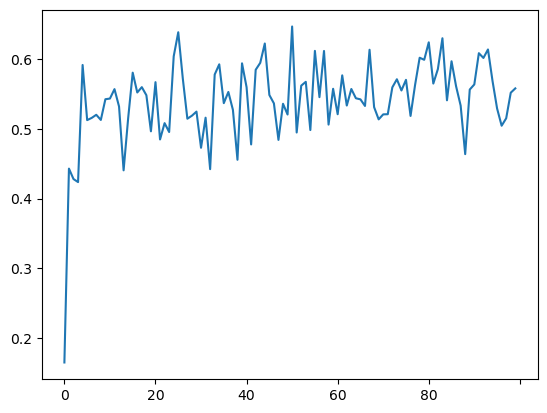

In [280]:
res['NDCG'].plot()

In [5]:
import gmf
import mlp
import ncf

In [11]:
m=np.array(M.todense())

In [32]:
models=[]

In [33]:
model = ncf.NCF(M.shape[1], M.shape[0])
model.load_state_dict(torch.load('nmf_models/nmf_60_1e-05.pt'))
model.eval()
models.append(model)

In [409]:
model = ncf.NCF(M.shape[1], M.shape[0])
model.load_state_dict(torch.load('nmf_pt_models_2/nmf_pt_80_1e-06.pt'))
model.eval()
models.append(model)

In [410]:
model = gmf.GMF(M.shape[1], M.shape[0])
model.load_state_dict(torch.load('gmf_models/gmf_80_1e-05.pt'))
model.eval()
models.append(model)

In [12]:
model = mlp.MLP(M.shape[1], M.shape[0])
model.load_state_dict(torch.load('mlp_models/mlp_80_1e-05.pt'))
model.eval()
models.append(model)

In [34]:
n=0
rec_list=[]
for model in models:
    pred = model(torch.tensor(m[n], dtype=torch.float32),
                               torch.tensor(m.T, dtype=torch.float32))


    pred_df=pd.DataFrame(pred.T.detach(), columns=c)

    known = c[np.where(m[n] == 1)]
    unknown = c[np.where(m[n] == 0)]
    rec = pred_df[unknown].T.sort_values(by=0, ascending=False).index[:20]
    rec_list.append(rec)

In [17]:
metadata_df.set_index('id').loc[known].reset_index()[['name','artists']]

,name,artists
0,Lose Control (feat. Ciara & Fat Man Scoop),"['Missy Elliott', 'Ciara', 'Fatman Scoop']"
1,Toxic,['Britney Spears']
2,Rock Your Body,['Justin Timberlake']
3,My Boo,"['Usher', 'Alicia Keys']"
4,Buttons,['The Pussycat Dolls']
5,Say My Name,"[""Destiny's Child""]"
6,Hey Ya! - Radio Mix,['OutKast']
7,Promiscuous,"['Nelly Furtado', 'Timbaland']"
8,Beautiful Soul,['Jesse McCartney']
9,Leavin',['Jesse McCartney']


In [35]:
metadata_df.set_index('id').loc[rec_list[0]].reset_index()[['name','artists']]

,name,artists
0,Ignition - Remix,['R. Kelly']
1,Wannabe,['Spice Girls']
2,No Scrubs,['TLC']
3,Bump n' Grind,['R. Kelly']
4,"One, Two Step (feat. Missy Elliott)","['Ciara', 'Missy Elliott']"
5,Hips Don't Lie (feat. Wyclef Jean),"['Shakira', 'Wyclef Jean']"
6,I'll Make Love To You,['Boyz II Men']
7,SexyBack (feat. Timbaland),"['Justin Timberlake', 'Timbaland']"
8,U Got It Bad,['Usher']
9,Hot In Herre,['Nelly']
